<a href="https://colab.research.google.com/github/claudioldc/MBA/blob/main/ExperienciaSalario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as Bibliotecas

In [ ]:
import pandas as pd # Trabalhar com as tabelas e importação dos arquivos utilizados
import plotly.express as px # biblioteca para criar gráficos dinâmicos
import seaborn as sns # biblioteca para gráficos
import numpy as np # funções matemáticas de alto nível


In [ ]:
pd.read_csv('Experience-Salary.csv')


,client_ID,exp(in months),salary(in thousands)
0,1,18.290293,16.521825
1,2,17.023407,11.666234
2,3,26.343613,23.167255
3,4,19.105834,20.877145
4,5,27.742516,23.166236
...,...,...,...
995,996,22.161741,24.666502
996,997,32.266497,24.160270
997,998,17.039030,19.903797
998,999,25.222124,21.974413


In [ ]:
base_custo_salario = pd.read_csv('Experience-Salary.csv')

In [ ]:
base_custo_salario.head()

,client_ID,exp(in months),salary(in thousands)
0,1,18.290293,16.521825
1,2,17.023407,11.666234
2,3,26.343613,23.167255
3,4,19.105834,20.877145
4,5,27.742516,23.166236


In [ ]:
base_custo_salario.describe()

,client_ID,exp(in months),salary(in thousands)
count,1000.000000,1000.000000,1000.000000
mean,500.500000,26.157825,26.722597
std,288.819436,8.717091,8.844761
min,1.000000,0.697594,-1.276342
25%,250.750000,20.073600,20.531008
50%,500.500000,25.875225,26.745576
75%,750.250000,32.406986,32.615753
max,1000.000000,49.463222,55.297016


Criando Variáveis que serão utilizadas no Modelo

In [ ]:
#Variável Independente
x_salario_exp = base_custo_salario.iloc[:,1].values #Buscamos todos os registros da primeira coluna e colocamos no formato de array
#o comando iloc permite selecionar um conjunto de registros. Os : significa que estamos selecionando todos os registros e "0", a primeira coluna.
x_salario_exp

array([18.29029332, 17.02340669, 26.34361348, 19.10583387, 27.74251647,
       31.67117131, 14.18639863, 29.932845  , 32.84132735, 26.87386911,
       41.51380791, 32.20117764, 34.73822584, 27.51493135, 25.76125817,
       36.92531809, 23.7470025 , 24.09348782, 16.13380215, 23.252563  ,
       25.63058204, 27.59918582, 22.92110427, 20.05168098, 24.98304725,
       33.91865279, 44.45485384, 19.58633061, 18.51115733, 31.54165401,
       31.71843486, 18.32610619, 21.34802336, 26.91006992, 34.93973987,
       27.33055795, 21.36414187, 29.78202486, 15.74794461, 14.39682659,
       28.50094976, 21.88009726, 10.59131485, 17.12255632, 36.48815058,
       19.5314334 , 34.00288198, 43.27144687, 20.47647992,  4.93608379,
       21.17397468, 34.39341812, 27.06220405, 33.72339535, 28.63074094,
       25.31227406, 27.33759393, 18.6145    , 31.87655812, 34.60896563,
       17.06008698, 25.74391561, 34.15232257, 20.95214793, 12.01485032,
       12.40825677, 29.33854386, 31.20573764, 23.96472542,  7.30

In [ ]:
#criando variável dependente (o que queremos predizer)
y_salario_exp = base_custo_salario.iloc[:,2].values
y_salario_exp

array([16.52182491, 11.66623372, 23.16725455, 20.87714542, 23.16623569,
       32.96625076, 15.29416954, 33.15946113, 32.0326529 , 32.34778358,
       38.24687556, 22.77360262, 39.55484071, 26.92287021, 28.11647711,
       32.53300295, 26.04333166, 24.08604097, 20.91991068, 21.04163596,
       25.71871117, 25.59144379, 28.90651651, 18.3044055 , 22.23621025,
       35.84581749, 33.88003752, 15.42500761, 17.93958494, 34.29649187,
       33.22816701, 29.33940107, 16.87796087, 25.28793949, 33.34363003,
       29.71901605, 31.50346438, 31.89158173, 11.76671344, 18.72605029,
       25.14671577, 30.95664408, 18.59792877, 17.09070229, 43.24708198,
       21.84910721, 22.44163536, 52.85914566, 22.13167953, 18.68699002,
       31.48749514, 35.6672927 , 29.23848608, 41.5408647 , 32.67293143,
       30.08146509, 28.44371365, 25.83807529, 39.44702366, 32.15241704,
       12.94952236, 14.74157643, 26.54923556, 24.06077464, 10.64228012,
       15.93890415, 33.86065242, 28.9229164 , 20.34495438,  8.48

In [ ]:
np.corrcoef(x_salario_exp,y_salario_exp) #mostra uma matriz

array([[1.        , 0.81096929],
       [0.81096929, 1.        ]])

<Axes: >

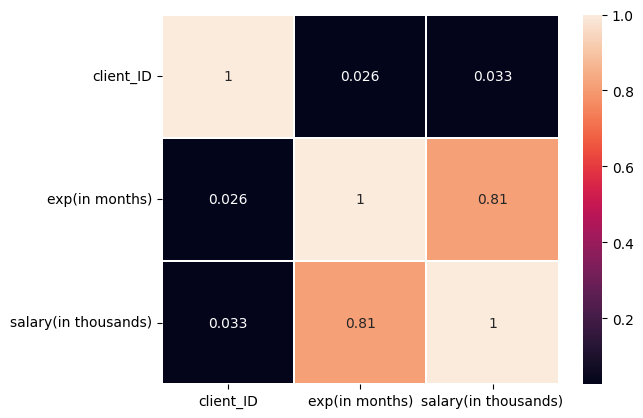

In [ ]:
correlation = base_custo_salario.corr()
#plot da matriz de correlação
plot = sns.heatmap(correlation, annot = True, linewidths=.3)
plot

<Axes: >

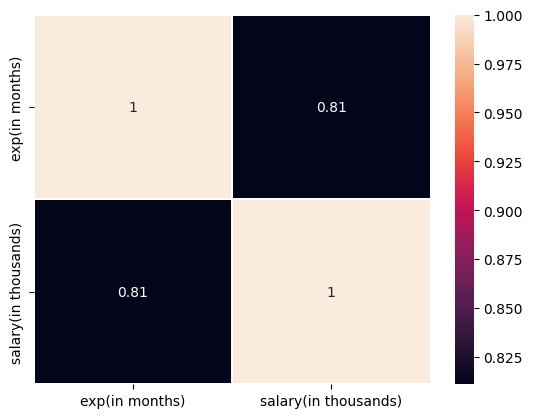

In [ ]:
# Excluindo a primeira coluna (assumindo que ela é a coluna 0)
base_custo_salario_novo = base_custo_salario.drop(base_custo_salario.columns[0], axis=1)

# Calculando a correlação no DataFrame modificado
correlation = base_custo_salario_novo.corr()

# Plotando a matriz de correlação
plot = sns.heatmap(correlation, annot=True, linewidths=.3)
plot


In [ ]:
#Visualizar o formato da variável
x_salario_exp.shape #

(1000,)

In [ ]:
#Visualizando a variável x_salario_exp
x_salario_exp # O resultado mostra que temos uma array com apenas uma coluna/dimensão. Precisamos ter uma matriz com duas colunas


array([18.29029332, 17.02340669, 26.34361348, 19.10583387, 27.74251647,
       31.67117131, 14.18639863, 29.932845  , 32.84132735, 26.87386911,
       41.51380791, 32.20117764, 34.73822584, 27.51493135, 25.76125817,
       36.92531809, 23.7470025 , 24.09348782, 16.13380215, 23.252563  ,
       25.63058204, 27.59918582, 22.92110427, 20.05168098, 24.98304725,
       33.91865279, 44.45485384, 19.58633061, 18.51115733, 31.54165401,
       31.71843486, 18.32610619, 21.34802336, 26.91006992, 34.93973987,
       27.33055795, 21.36414187, 29.78202486, 15.74794461, 14.39682659,
       28.50094976, 21.88009726, 10.59131485, 17.12255632, 36.48815058,
       19.5314334 , 34.00288198, 43.27144687, 20.47647992,  4.93608379,
       21.17397468, 34.39341812, 27.06220405, 33.72339535, 28.63074094,
       25.31227406, 27.33759393, 18.6145    , 31.87655812, 34.60896563,
       17.06008698, 25.74391561, 34.15232257, 20.95214793, 12.01485032,
       12.40825677, 29.33854386, 31.20573764, 23.96472542,  7.30

In [ ]:
x_salario_exp = x_salario_exp.reshape(-1,1)
x_salario_exp

array([[18.29029332],
       [17.02340669],
       [26.34361348],
       [19.10583387],
       [27.74251647],
       [31.67117131],
       [14.18639863],
       [29.932845  ],
       [32.84132735],
       [26.87386911],
       [41.51380791],
       [32.20117764],
       [34.73822584],
       [27.51493135],
       [25.76125817],
       [36.92531809],
       [23.7470025 ],
       [24.09348782],
       [16.13380215],
       [23.252563  ],
       [25.63058204],
       [27.59918582],
       [22.92110427],
       [20.05168098],
       [24.98304725],
       [33.91865279],
       [44.45485384],
       [19.58633061],
       [18.51115733],
       [31.54165401],
       [31.71843486],
       [18.32610619],
       [21.34802336],
       [26.91006992],
       [34.93973987],
       [27.33055795],
       [21.36414187],
       [29.78202486],
       [15.74794461],
       [14.39682659],
       [28.50094976],
       [21.88009726],
       [10.59131485],
       [17.12255632],
       [36.48815058],
       [19

In [ ]:
#Agora temos uma matriz com duas colunas. 1000 linhas e uma coluna
x_salario_exp.shape

(1000, 1)

Aplicando os dados ao algoritmo machine learning

In [ ]:
from sklearn.linear_model import LinearRegression
#Cria um objeto do tipo regressão linear
previsao_salario_exp = LinearRegression()

In [ ]:
type(previsao_salario_exp)

sklearn.linear_model._base.LinearRegression

Realizando o Treinamento do Modelo

In [ ]:
previsao_salario_exp.fit(x_salario_exp,y_salario_exp)

LinearRegression()

In [ ]:
#Verificando a Interceptação
previsao_salario_exp.intercept_

5.1987185649885745

In [ ]:
#Verificando o coeficiente angular da reta
previsao_salario_exp.coef_

array([0.82284666])

In [ ]:
previsao_salario_exp = previsao_salario_exp.predict(x_salario_exp) #Baseado na experiência vamos estimar/prever o custo do salário
previsao_salario_exp

array([20.24882536, 19.20637193, 26.87547297, 20.91989019, 28.02655563,
       31.25923615, 16.87194932, 29.82886015, 32.22209514, 27.31179205,
       39.35821682, 31.69535009, 33.78295173, 27.83928797, 26.39628385,
       35.58259329, 24.73886029, 25.02396459, 18.4743638 , 24.33201241,
       26.28875744, 27.90861648, 24.05927269, 21.69817732, 25.75593559,
       33.10856878, 41.77824664, 21.31526532, 20.43056258, 31.15266327,
       31.2981268 , 20.27829386, 22.76486832, 27.34157976, 33.94876688,
       27.68757694, 22.77813139, 29.7047583 , 18.15686222, 17.04509927,
       28.65062993, 23.20268355, 13.91374664, 19.28795687, 35.22287146,
       21.27009334, 33.17787649, 40.80448417, 22.04772171,  9.26035863,
       22.62165295, 33.49922785, 27.46676283, 32.94790185, 28.75742817,
       26.02683878, 27.69336647, 20.51559775, 31.428238  , 33.6765904 ,
       19.23655418, 26.38201358, 33.30084318, 22.43912354, 15.08509804,
       15.40881122, 29.33984144, 30.87625561, 24.91801287, 11.20

In [ ]:
#Verificando o tipo da variável x_salario_exp
x_salario_exp

array([[18.29029332],
       [17.02340669],
       [26.34361348],
       [19.10583387],
       [27.74251647],
       [31.67117131],
       [14.18639863],
       [29.932845  ],
       [32.84132735],
       [26.87386911],
       [41.51380791],
       [32.20117764],
       [34.73822584],
       [27.51493135],
       [25.76125817],
       [36.92531809],
       [23.7470025 ],
       [24.09348782],
       [16.13380215],
       [23.252563  ],
       [25.63058204],
       [27.59918582],
       [22.92110427],
       [20.05168098],
       [24.98304725],
       [33.91865279],
       [44.45485384],
       [19.58633061],
       [18.51115733],
       [31.54165401],
       [31.71843486],
       [18.32610619],
       [21.34802336],
       [26.91006992],
       [34.93973987],
       [27.33055795],
       [21.36414187],
       [29.78202486],
       [15.74794461],
       [14.39682659],
       [28.50094976],
       [21.88009726],
       [10.59131485],
       [17.12255632],
       [36.48815058],
       [19

In [ ]:
x_salario_exp.ravel() #transforma em um vetor

array([18.29029332, 17.02340669, 26.34361348, 19.10583387, 27.74251647,
       31.67117131, 14.18639863, 29.932845  , 32.84132735, 26.87386911,
       41.51380791, 32.20117764, 34.73822584, 27.51493135, 25.76125817,
       36.92531809, 23.7470025 , 24.09348782, 16.13380215, 23.252563  ,
       25.63058204, 27.59918582, 22.92110427, 20.05168098, 24.98304725,
       33.91865279, 44.45485384, 19.58633061, 18.51115733, 31.54165401,
       31.71843486, 18.32610619, 21.34802336, 26.91006992, 34.93973987,
       27.33055795, 21.36414187, 29.78202486, 15.74794461, 14.39682659,
       28.50094976, 21.88009726, 10.59131485, 17.12255632, 36.48815058,
       19.5314334 , 34.00288198, 43.27144687, 20.47647992,  4.93608379,
       21.17397468, 34.39341812, 27.06220405, 33.72339535, 28.63074094,
       25.31227406, 27.33759393, 18.6145    , 31.87655812, 34.60896563,
       17.06008698, 25.74391561, 34.15232257, 20.95214793, 12.01485032,
       12.40825677, 29.33854386, 31.20573764, 23.96472542,  7.30

In [ ]:
y_salario_exp

array([16.52182491, 11.66623372, 23.16725455, 20.87714542, 23.16623569,
       32.96625076, 15.29416954, 33.15946113, 32.0326529 , 32.34778358,
       38.24687556, 22.77360262, 39.55484071, 26.92287021, 28.11647711,
       32.53300295, 26.04333166, 24.08604097, 20.91991068, 21.04163596,
       25.71871117, 25.59144379, 28.90651651, 18.3044055 , 22.23621025,
       35.84581749, 33.88003752, 15.42500761, 17.93958494, 34.29649187,
       33.22816701, 29.33940107, 16.87796087, 25.28793949, 33.34363003,
       29.71901605, 31.50346438, 31.89158173, 11.76671344, 18.72605029,
       25.14671577, 30.95664408, 18.59792877, 17.09070229, 43.24708198,
       21.84910721, 22.44163536, 52.85914566, 22.13167953, 18.68699002,
       31.48749514, 35.6672927 , 29.23848608, 41.5408647 , 32.67293143,
       30.08146509, 28.44371365, 25.83807529, 39.44702366, 32.15241704,
       12.94952236, 14.74157643, 26.54923556, 24.06077464, 10.64228012,
       15.93890415, 33.86065242, 28.9229164 , 20.34495438,  8.48

In [ ]:
grafico = px.scatter(x = x_salario_exp.ravel(), y = y_salario_exp)
grafico.show()

In [ ]:
# Usando um modelo de regressão linear
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(x_salario_exp, y_salario_exp)
previsao_salario = modelo.predict(x_salario_exp)


In [ ]:
grafico = px.scatter(x = x_salario_exp.ravel(), y = y_salario_exp)
grafico.add_scatter(x = x_salario_exp.ravel(), y = previsao_salario, name = 'previsoes')
grafico.show()

In [ ]:
import numpy as np

# Fazendo previsão para (20 meses de experiência)
nova_experiencia = np.array([[20]])

# Fazer a previsão para o valor acima
salario_previsto = modelo.predict(nova_experiencia)

# Exibir o salário previsto
print("Salário previsto para 20 meses de experiência: ", salario_previsto[0])



Salário previsto para 20 meses de experiência:  21.65565179904684


In [ ]:
# Fazendo previsão para (14 meses de experiência)
nova_experiencia = np.array([[14]])

# Fazer a previsão para o valor acima
salario_previsto = modelo.predict(nova_experiencia)

# Exibir o salário previsto
print("Salário previsto para 14 meses de experiência: ", salario_previsto[0])

Salário previsto para 14 meses de experiência:  16.71857182882936


In [ ]:
#Indica a qualidade do algoritmo (quanto mais próximo de 1, melhor a qualidade do modelo)
score = modelo.score(x_salario_exp, y_salario_exp)

print("R²:", score)


R²: 0.6576711967581766


In [ ]:
#Visualizando os erros do modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(y_salario_exp, previsao_salario)

In [ ]:
MSE

26.75353064566882

In [ ]:
#Calculando MAE
mean_absolute_error(y_salario_exp, previsao_salario)

4.087007093719527

In [ ]:
#Calculando RMSE
np.sqrt(MSE)

5.172381525532394